In [9]:
# dataset prep one time
import os, shutil, pathlib
original_dir = pathlib.Path("./../data/PetImages")
new_basedir = pathlib.Path("./../data/PetImages/cat_vs_dog_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        newdir = new_basedir / subset_name / category
        os.makedirs(newdir, exist_ok=True)
        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src= original_dir / category / fname,
                            dst = newdir / f"{fname}")

os.listdir(original_dir)

['Cat', 'cat_vs_dogs_small', 'Dog', 'cat_vs_dog_small']

In [11]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [68]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [57]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                     

In [69]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [59]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    new_basedir / "train",
    image_size=(180, 180),
    batch_size=32
)
val_dataset = image_dataset_from_directory(
    new_basedir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    new_basedir / "test",
    image_size=(180, 180),
    batch_size=32
)

Found 1999 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [60]:
clean_train_dataset = train_dataset.ignore_errors()
clean_val_dataset = val_dataset.ignore_errors()
clean_test_dataset = test_dataset.ignore_errors()


In [70]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="assets/convnet_from_scratch",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    clean_train_dataset,
    epochs=30,
    validation_data=clean_val_dataset,
    callbacks=callbacks
)

Epoch 1/30
     63/Unknown - 3s 41ms/step - loss: 0.7345 - accuracy: 0.5288

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


63/63 [==============================] - 4s 53ms/step - loss: 0.7345 - accuracy: 0.5288 - val_loss: 0.6906 - val_accuracy: 0.5430
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5548

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


63/63 [==============================] - 3s 50ms/step - loss: 0.6920 - accuracy: 0.5548 - val_loss: 0.6470 - val_accuracy: 0.6410
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.6597 - accuracy: 0.6183

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


63/63 [==============================] - 3s 50ms/step - loss: 0.6597 - accuracy: 0.6183 - val_loss: 0.6073 - val_accuracy: 0.6710
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 0.6119 - accuracy: 0.6758

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.6119 - accuracy: 0.6758 - val_loss: 0.6214 - val_accuracy: 0.6410
Epoch 5/30
63/63 [==============================] - ETA: 0s - loss: 0.5837 - accuracy: 0.6903

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


63/63 [==============================] - 3s 53ms/step - loss: 0.5837 - accuracy: 0.6903 - val_loss: 0.6004 - val_accuracy: 0.6650
Epoch 6/30
63/63 [==============================] - ETA: 0s - loss: 0.5546 - accuracy: 0.7189

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


INFO:tensorflow:Assets written to: assets/convnet_from_scratch/assets


63/63 [==============================] - 4s 57ms/step - loss: 0.5546 - accuracy: 0.7189 - val_loss: 0.5840 - val_accuracy: 0.7080
Epoch 7/30
63/63 [==============================] - ETA: 0s - loss: 0.5242 - accuracy: 0.7399

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.5242 - accuracy: 0.7399 - val_loss: 0.6046 - val_accuracy: 0.7060
Epoch 8/30
63/63 [==============================] - ETA: 0s - loss: 0.4727 - accuracy: 0.7744

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.4727 - accuracy: 0.7744 - val_loss: 0.5999 - val_accuracy: 0.6970
Epoch 9/30
63/63 [==============================] - ETA: 0s - loss: 0.4336 - accuracy: 0.8054

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.4336 - accuracy: 0.8054 - val_loss: 0.6971 - val_accuracy: 0.7230
Epoch 10/30
63/63 [==============================] - ETA: 0s - loss: 0.3921 - accuracy: 0.8194

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 48ms/step - loss: 0.3921 - accuracy: 0.8194 - val_loss: 0.6302 - val_accuracy: 0.7130
Epoch 11/30
63/63 [==============================] - ETA: 0s - loss: 0.3514 - accuracy: 0.8459

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 49ms/step - loss: 0.3514 - accuracy: 0.8459 - val_loss: 0.7378 - val_accuracy: 0.6870
Epoch 12/30
63/63 [==============================] - ETA: 0s - loss: 0.2871 - accuracy: 0.8794

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 49ms/step - loss: 0.2871 - accuracy: 0.8794 - val_loss: 0.8850 - val_accuracy: 0.7190
Epoch 13/30
63/63 [==============================] - ETA: 0s - loss: 0.2414 - accuracy: 0.8984

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.2414 - accuracy: 0.8984 - val_loss: 0.8928 - val_accuracy: 0.7460
Epoch 14/30
63/63 [==============================] - ETA: 0s - loss: 0.2107 - accuracy: 0.9245

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.2107 - accuracy: 0.9245 - val_loss: 1.2883 - val_accuracy: 0.6570
Epoch 15/30
62/63 [============================>.] - ETA: 0s - loss: 0.1726 - accuracy: 0.9385

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 50ms/step - loss: 0.1714 - accuracy: 0.9390 - val_loss: 0.9914 - val_accuracy: 0.7240
Epoch 16/30
62/63 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9506

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 51ms/step - loss: 0.1408 - accuracy: 0.9505 - val_loss: 1.1279 - val_accuracy: 0.7340
Epoch 17/30
63/63 [==============================] - ETA: 0s - loss: 0.1242 - accuracy: 0.9560

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.1242 - accuracy: 0.9560 - val_loss: 1.2082 - val_accuracy: 0.7360
Epoch 18/30
63/63 [==============================] - ETA: 0s - loss: 0.1015 - accuracy: 0.9680

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.1015 - accuracy: 0.9680 - val_loss: 1.1419 - val_accuracy: 0.7170
Epoch 19/30
63/63 [==============================] - ETA: 0s - loss: 0.0703 - accuracy: 0.9795

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0703 - accuracy: 0.9795 - val_loss: 1.2603 - val_accuracy: 0.7410
Epoch 20/30
63/63 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.9730

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0804 - accuracy: 0.9730 - val_loss: 1.4967 - val_accuracy: 0.7090
Epoch 21/30
63/63 [==============================] - ETA: 0s - loss: 0.0725 - accuracy: 0.9800

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0725 - accuracy: 0.9800 - val_loss: 1.6339 - val_accuracy: 0.7640
Epoch 22/30
63/63 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9760

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0568 - accuracy: 0.9760 - val_loss: 1.5116 - val_accuracy: 0.7430
Epoch 23/30
63/63 [==============================] - ETA: 0s - loss: 0.0497 - accuracy: 0.9805

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0497 - accuracy: 0.9805 - val_loss: 2.2352 - val_accuracy: 0.7330
Epoch 24/30
63/63 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9840

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0450 - accuracy: 0.9840 - val_loss: 1.8599 - val_accuracy: 0.7400
Epoch 25/30
63/63 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9865

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 2.3099 - val_accuracy: 0.7370
Epoch 26/30
63/63 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9835

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.0534 - accuracy: 0.9835 - val_loss: 2.6449 - val_accuracy: 0.7250
Epoch 27/30
63/63 [==============================] - ETA: 0s - loss: 0.0521 - accuracy: 0.9840

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 1.8578 - val_accuracy: 0.7540
Epoch 28/30
63/63 [==============================] - ETA: 0s - loss: 0.0539 - accuracy: 0.9825

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0539 - accuracy: 0.9825 - val_loss: 2.1306 - val_accuracy: 0.7230
Epoch 29/30
63/63 [==============================] - ETA: 0s - loss: 0.0562 - accuracy: 0.9815

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 46ms/step - loss: 0.0562 - accuracy: 0.9815 - val_loss: 1.8994 - val_accuracy: 0.7450
Epoch 30/30
63/63 [==============================] - ETA: 0s - loss: 0.0611 - accuracy: 0.9910

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 [==============================] - 3s 47ms/step - loss: 0.0611 - accuracy: 0.9910 - val_loss: 1.9940 - val_accuracy: 0.7400


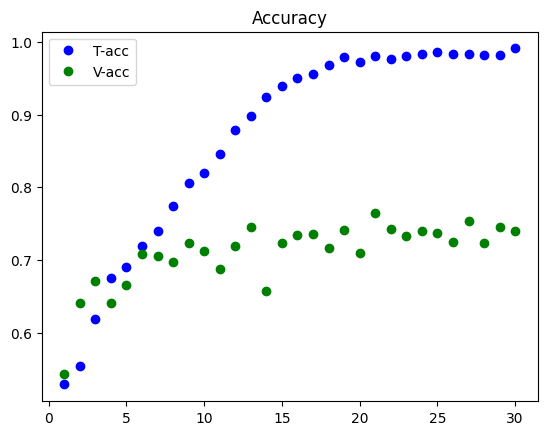

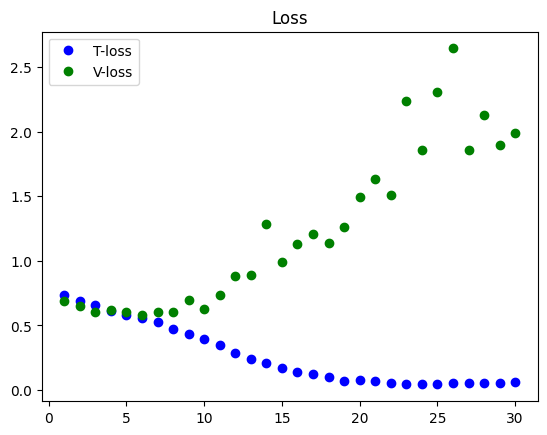

In [71]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="T-acc")
plt.plot(epochs, val_accuracy, "go", label="V-acc")
plt.title("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="T-loss")
plt.plot(epochs, val_loss, "go", label="V-loss")
plt.title("Loss")
plt.legend()
plt.show()

In [74]:
test_model = keras.models.load_model("assets/convnet_from_scratch")
test_loss, test_acc = test_model.evaluate(test_dataset)

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Input size should match (header_size + row_size * abs_height) but they differ by 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) INVALID_ARGUMENT:  Input size should match (header_size + row_size * abs_height) but they differ by 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_73722]

In [55]:
validate_jpeg_files("./../data/PetImages/cat_vs_dog_small")

[]